# Lab 3
* **Name**: Utkarsh Prakash
* **Roll Number**: 180030042

## Title
Demonstrate the 2-input, 2-output neural network, to perform 4 class classification test.

## Objective
To observe and understand the working of feedforward neural network and perceptron learning law.

## Hypothesis
The Perceptron Learning Law should be able to learn appropriate weights to classify the 4 classes. <br />

## Experimental Description
1. **Data Generation**:
(Synthetic Generation) For training and testing purposes we will generate data from Multivariate Gaussian density (2-dimension) with different mean vectors and identity covariance i.e. $x \in \{N(\mu_{1},I),N(\mu_{2},I), N(\mu_{3},I), N(\mu_{4},I)\}$. We will generate 1000 training examples for each class and 100 testing examples for each class. The class labels ${0, 1, 2, 3}$ are converted to their respective binary values. <br /><br />

2. **Objective**: 
To be able learn appropriate weights so as to perform 4-class classification. <br /><br />

3. **Perceptron**:
![Perceptron](tmp/IMG_4661.jpg) <br />
<center> Source: Artificial Neural Networks, B. Yegnanaryana, PHI 1999 </center><br /><br />
4. **Perceptron Learning law**: <br />
Let the index $m$ denote the learning process at the $m^{th}$ step. Let vectors $a$ and $w(m)$ be the input and weight vectors, respectively, at the mth step. $\eta$ is a positive learning rate parameter. The perceptron learning law can be stated as follows: 
<center> $w(m+1) = w(m) + \eta e(m)a(m)$ </center>
where $e(m) = b(m) - s(m)$, $b(m)$ is the desired output and $s(m)$ is the actual output for the input vector $a(m)$ to the perceptron. <br />
The non-linear function used in the output layer of the perceptron is defined as follows:
<center> $f(x) = 1, x > 0$ <br />
        $f(x) = 0, x <= 0$ </center> <br /><br />
        
5. **Error vs Iteration**: <br />
At each iteration we calculate the misclassification error and we plot the error as a function of the number of iterations. <br /><br />

6. **Testing**: 
Using the hyperplane generated during, we perform the classification for unseen data generated for testing in step 1.

## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Train Data Generation

In [157]:
m = 4000                            # Number of training examples

mean1 = np.array([0, 0])            # Mean for class 1
mean2 = np.array([10, 10])          # Mean for class 2
mean3 = np.array([0, 20])           # Mean for class 3
mean4 = np.array([-10, 10])           # Mean for class 4

covariance = np.eye(2)              # Identity covariance matrix

class_1 = np.random.multivariate_normal(mean1, covariance, m//4)    # Class 1 samples
class_2 = np.random.multivariate_normal(mean2, covariance, m//4)    # Class 2 samples
class_3 = np.random.multivariate_normal(mean3, covariance, m//4)    # Class 3 samples
class_4 = np.random.multivariate_normal(mean4, covariance, m//4)    # Class 4 samples

y1 = np.c_[np.zeros(m//4), np.zeros(m//4)]      # Class 1 labels
y2 = np.c_[np.zeros(m//4), np.ones(m//4)]       # Class 2 labels
y3 = np.c_[np.ones(m//4), np.ones(m//4)]       # Class 3 labels
y4 = np.c_[np.ones(m//4), np.zeros(m//4)]        # Class 4 labels

X = np.concatenate((class_1, class_2, class_3, class_4), axis=0)   # Train data
X = np.c_[np.ones((m, 1)), X]                # Augmenting the train data

y = np.concatenate((y1, y2, y3, y4), axis=0)    # Train labels

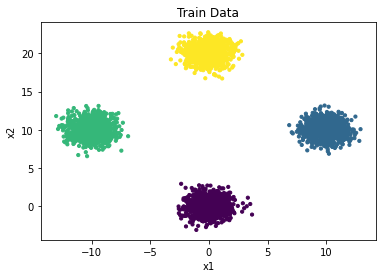

In [192]:
# Plotting Train Data
plt.figure()
plt.scatter(X[:, 1], X[:, 2], c=2*y[:, 0]+y[:, 1], s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Train Data')
plt.show()

In [159]:
print("Shape of the input vectors:", X.shape)
print("Shape of the output vectors:", y.shape)

Shape of the input vectors: (4000, 3)
Shape of the output vectors: (4000, 2)


### Perceptron

In [160]:
def MissClassificationError(X, y, w):
    '''
        This function calculates the fraction of examples
        misclassified by the perceptron.
    '''
    activation = np.dot(X, w)             # activation value
    y_pred = np.where(activation > 0, 1, 0) # output value
    
    return np.sum((y != y_pred).any(axis=1), axis=0)/X.shape[0]   # error calculation

In [161]:
def plot_hyperplane(X, y, w, num_epoch="", figsize=(6.4,4.8)):
    '''
        This function is for plotting the hyperplane separating the classes. 
    '''
    # Generating x-coordinates
    x_cor = np.linspace(np.min(X[:,[1,2]]),np.max(X[:,[1,2]]),1000).reshape(1000,1)
    y_cor1 = ((-w[0,0]-(w[1,0]*x_cor))/(w[2,0]))        # Generating y-coordinates for 1st hyperplane
    y_cor2 = ((-w[0,1]-(w[1,1]*x_cor))/(w[2,1]))        # Generating y-coordinates for 2nd hyperplane
    
    plt.figure(figsize=figsize)
    plt.scatter(X[:, 1], X[:, 2], c=2*y[:, 0]+y[:, 1], s=10)
    plt.plot(x_cor, y_cor1)
    plt.plot(x_cor, y_cor2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Epoch: {}'.format(num_epoch))
    plt.show()

#### Batch Update

In [162]:
def PerceptronLearningBatch(X, y, learning_rate=0.01, epochs=1000):
    '''
        This function implements the Perceptron Learning Law using
        Batch update.
    '''
    errors = []          # List for storing errors

    w=np.random.uniform(0,1,(X.shape[1],y.shape[1]))   # Weight initialisation
    print(w)
    
    for i in range(epochs):
        activation = np.dot(X, w)                # activation value
        output = np.where(activation > 0, 1, 0)  # output value

        error = y - output                 # error m, 2 m, 3

        gradient = (learning_rate*np.dot(X.T, error))/(2*X.shape[0])     # gradient calculation

        w = w + gradient                  # weight update
        
        # Misclassification Error 
        missclassification_error = MissClassificationError(X, y, w)

        errors.append(MissClassificationError(X, y, w))
        
        # Plotting the hyperplane after every 100 epochs
        if i%100 == 0:
            plot_hyperplane(X, y, w, i, (8, 8))

            print("Epoch:", i)
            print("Miss Classification Error:", missclassification_error)
        
        # Early stopping
        if np.linalg.norm(gradient)<= 10**(-10):
            plot_hyperplane(X, y, w, i)
            
            print("Epoch:", i)
            print("Miss Classification Error:", missclassification_error)
            
            break
            
    return w, errors

[[0.16694843 0.28973695]
 [0.49469807 0.91679251]
 [0.55642231 0.91098986]]


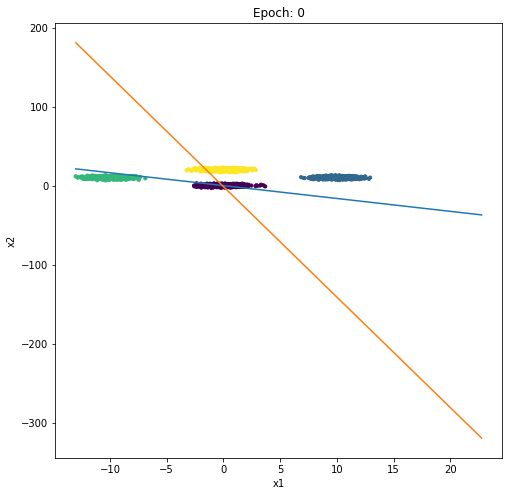

Epoch: 0
Miss Classification Error: 0.48225


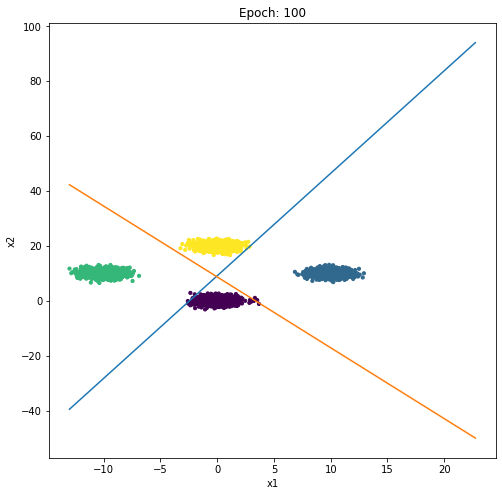

Epoch: 100
Miss Classification Error: 0.00175


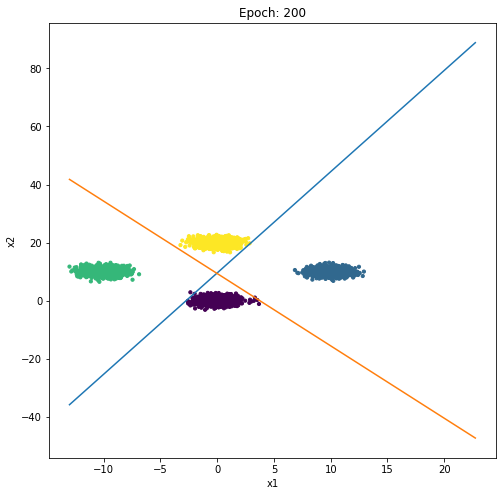

Epoch: 200
Miss Classification Error: 0.00025


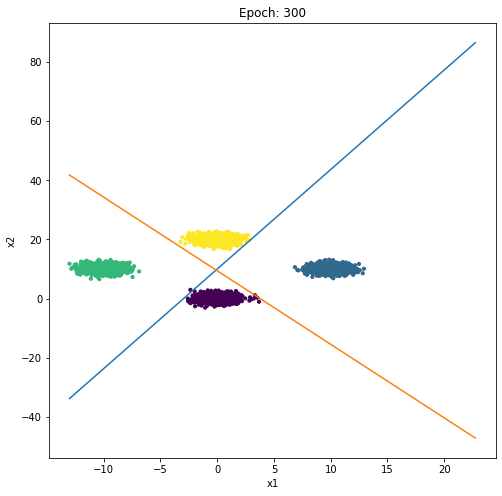

Epoch: 300
Miss Classification Error: 0.00025


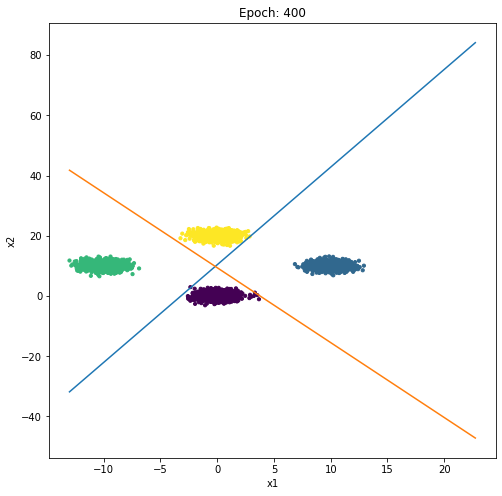

Epoch: 400
Miss Classification Error: 0.00025


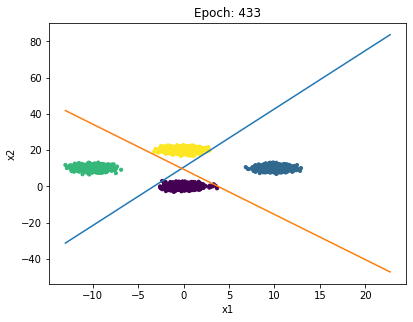

Epoch: 433
Miss Classification Error: 0.0
Time Taken: 1.2432334423065186


In [163]:
start_time = time.time()
w, errors = PerceptronLearningBatch(X, y, learning_rate=1, epochs=100000)
print("Time Taken:", time.time() - start_time)

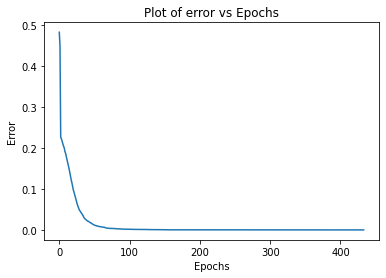

In [164]:
# Plotting Error vs Epochs
plt.figure()
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Plot of error vs Epochs")
plt.show()

### Testing

In [165]:
m = 400                            # Number of training examples

mean1 = np.array([0, 0])            # Mean for class 1
mean2 = np.array([10, 10])          # Mean for class 2
mean3 = np.array([0, 20])           # Mean for class 3
mean4 = np.array([-10, 10])           # Mean for class 4

covariance = np.eye(2)              # Identity covariance matrix

class_1 = np.random.multivariate_normal(mean1, covariance, m//4)    # Class 1 samples
class_2 = np.random.multivariate_normal(mean2, covariance, m//4)    # Class 2 samples
class_3 = np.random.multivariate_normal(mean3, covariance, m//4)    # Class 3 samples
class_4 = np.random.multivariate_normal(mean4, covariance, m//4)    # Class 4 samples

y1 = np.c_[np.zeros(m//4), np.zeros(m//4)]      # Class 1 labels
y2 = np.c_[np.zeros(m//4), np.ones(m//4)]       # Class 2 labels
y3 = np.c_[np.ones(m//4), np.ones(m//4)]       # Class 3 labels
y4 = np.c_[np.ones(m//4), np.zeros(m//4)]        # Class 4 labels

X_test = np.concatenate((class_1, class_2, class_3, class_4), axis=0)   # Test data
X_test = np.c_[np.ones((m, 1)), X_test]                # Augmenting the test data

y_test = np.concatenate((y1, y2, y3, y4), axis=0)    # Test labels

In [166]:
print("Shape of the input test vectors:", X_test.shape)
print("Shape of the output test vectors:", y_test.shape)

Shape of the input test vectors: (400, 3)
Shape of the output test vectors: (400, 2)


In [167]:
print("The misclassification error on test set is:", MissClassificationError(X_test, y_test, w))

The misclassification error on test set is: 0.0


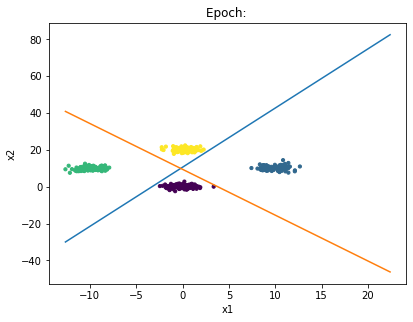

In [168]:
plot_hyperplane(X_test, y_test, w)       # Hyperplane + Test data

## Observations
#### Effect of different initialisation:
|w| Training Error | Testing Error |
| --- | --- | --- |
| \[\[0.83631018 0.33475651\],\[0.78559487 0.71662866\], \[0.79410616 0.73299231\]\] | 0.0 | 0.0 |
| \[\[0.85586024 0.46554412\], \[0.96950511 0.21136353\], \[0.41305633 0.47299947\]\] | 0.0 | 0.0 |
| \[\[0. 0.\], \[0. 0.\], \[0. 0.\]\] | 0.0 | 0.005 |
| \[\[ 0.83073618 -0.55064271\], \[ 0.03482933 -0.54713059\], \[ 0.63332034 -1.63210409\]\] | 0.0 | 0.0 |

#### Effect of different Learning Rates:

| Learning Rates | Number of Epochs until convergence |
| --- | --- |
| 0.01 | 55566 |
| 0.1 | 8196 |
| 1 | 211 |

#### One Training Example Update

In [169]:
def PerceptronLearning(X, y, learning_rate=0.01, epochs=1000):
    '''
        This function implements the Perceptron Learning Law 
        for single example update.
    '''
    errors = []          # List for storing errors
    
    w = np.random.randn(y.shape[1], X.shape[1])      # Weight initialisation
    
    for i in range(epochs):
        # Randomly shuffle the training example
        permutation = np.random.permutation(X.shape[0])
        X = X[permutation]
        y = y[permutation]
        
        # Iterate over the training examples
        for j in range(X.shape[0]):
            activation = np.dot(w, X[j, :])          # activation value
            output = np.where(activation > 0, 1, 0)  # output value
            
            error = y[j, :] - output                 # error
            error = np.expand_dims(error, axis=-1)
            
            # gradient calculation
            gradient = learning_rate*np.dot(error, np.expand_dims(X[j, :], axis=-1).T)
            
            # weight update
            w = w + gradient
        
            # Misclassification Error 
            missclassification_error = MissClassificationError(X, y, w.T)

            errors.append(missclassification_error)
        
        # Early Stopping
        if np.linalg.norm(gradient)<= 10**(-10):
            plot_hyperplane(X, y, w.T, i+1)
            
            print("Epoch:", i+1)
            print("Miss Classification Error:", missclassification_error)
            
            break
            
    return w, errors

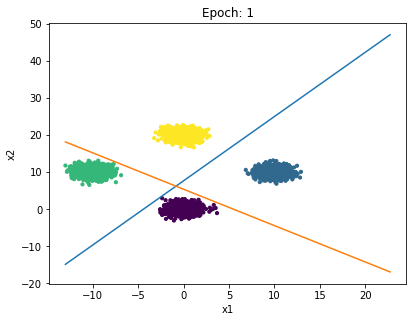

Epoch: 1
Miss Classification Error: 0.0
Time Taken: 0.8347110748291016


In [183]:
start_time = time.time()
w, errors = PerceptronLearning(X, y, learning_rate=1, epochs=1000)
print("Time Taken:", time.time() - start_time)

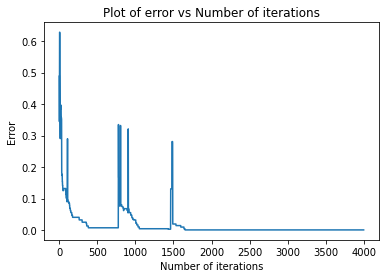

In [191]:
plt.figure()
plt.plot(errors)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.title("Plot of error vs Number of iterations")
plt.show()

In [194]:
print("The misclassification error on test set is:", MissClassificationError(X_test, y_test, w.T))

The misclassification error on test set is: 0.0


## Conclusion
* The Perceptron Learning Law is able to learn appropriate weights to classify all the 4 classes since the classes are linearly separable.
* The initialisation of different weight seems to have no effect on the training and testing error.
* As we decrease the learning rate, we observe that the number of epochs until convergence increases.
* The Batch update is more time consuming than the single example update.
* The plot of error vs number of epochs is smooth for the Batch update whereas is noisy for single example update which can attributed to the stochastic nature of presentation of examples to the perceptron in single example update.

## References
1. Artificial Neural Networks, B. Yegnanaryana, 1999